# Superstore Project

For this capstone project we will be analyzing some superstore giant data from [Kaggle](https://www.kaggle.com/datasets/vivek468/superstore-dataset-final?resource=download).

**Context** 

They are seeking our knowledge  in understanding what works best for them. They would like to understand which products, regions, categories and customer segments they should target or avoid.


# Features 
* Row ID => Unique ID for each row.
* Order ID => Unique Order ID for each Customer.
* Order Date => Order Date of the product.
* Ship Date => Shipping Date of the Product.
* Ship Mode=> Shipping Mode specified by the Customer.
* Customer ID => Unique ID to identify each Customer.
* Customer Name => Name of the Customer.
* Segment => The segment where the Customer belongs.
* Country => Country of residence of the Customer.
* City => City of residence of of the Customer.
* State => State of residence of the Customer.
* Postal Code => Postal Code of every Customer.
* Region => Region where the Customer belong.
* Product ID => Unique ID of the Product.
* Category => Category of the product ordered.
* Sub-Category => Sub-Category of the product ordered.
* Product Name => Name of the Product
* Sales => Sales of the Product.
* Quantity => Quantity of the Product.
* Discount => Discount provided.
* Profit => Profit/Loss incurred.

## Preparing the tools 

In [1]:
# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#we want our plots to appear inside the notebook 
%matplotlib inline 

In [3]:
import cufflinks as cf

In [4]:
from plotly.offline import download_plotlyjs, init_notebook_mode,plot,iplot

In [5]:
init_notebook_mode(connected=True)

In [6]:
cf.go_offline()

## Load Data 

In [7]:
df = pd.read_csv('Superstore.csv',encoding= 'unicode_escape')

In [8]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Exploratory Data analysis

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [10]:
df.shape

(9994, 21)

In [11]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


### Add datetime parameters for `Order Date` column 

In [12]:
df['Order Date'].dtype # the order date is object type 

dtype('O')

In [13]:
df['Order Date'] = pd.to_datetime(df['Order Date']) # changing order date type to datetime type

In [14]:
df['Order Date'][0].dayofweek

1

In [15]:
df['orderDayofweek']  =  df['Order Date'].apply(lambda x: x.dayofweek)
df['orderMonth'] = df['Order Date'].apply(lambda x: x.month)
df['orderYear'] = df['Order Date'].apply(lambda x: x.year)

In [16]:
dayOfWeek = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['orderDayofweek'] = df['orderDayofweek'].map(dayOfWeek)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          9994 non-null   int64         
 1   Order ID        9994 non-null   object        
 2   Order Date      9994 non-null   datetime64[ns]
 3   Ship Date       9994 non-null   object        
 4   Ship Mode       9994 non-null   object        
 5   Customer ID     9994 non-null   object        
 6   Customer Name   9994 non-null   object        
 7   Segment         9994 non-null   object        
 8   Country         9994 non-null   object        
 9   City            9994 non-null   object        
 10  State           9994 non-null   object        
 11  Postal Code     9994 non-null   int64         
 12  Region          9994 non-null   object        
 13  Product ID      9994 non-null   object        
 14  Category        9994 non-null   object        
 15  Sub-

In [18]:
# Now we've enriched our DataFrame with date time features, we can remove 'order date'
df.drop('Order Date',axis=1,inplace=True)

### Add datetime parameters for `ship date` column 

In [19]:
df['Ship Date'].dtype # the shipe date is object type 

dtype('O')

In [20]:
# convert ship date to datetime type 
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [21]:
df['Ship Date'].dtype

dtype('<M8[ns]')

In [22]:
df['Ship Date'][0].year

2016

In [23]:
df['shipDayofweek'] = df['Ship Date'].apply(lambda x: x.dayofweek)
df['shipMonth'] = df['Ship Date'].apply(lambda x: x.month)
df['shipYear'] = df['Ship Date'].apply(lambda x: x.year)

In [24]:
dayOfWeek = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['shipDayofweek'] = df['shipDayofweek'].map(dayOfWeek)

In [25]:
# Now we've enriched our DataFrame with date time features, we can remove 'saledate'
df.drop('Ship Date',axis=1,inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          9994 non-null   int64  
 1   Order ID        9994 non-null   object 
 2   Ship Mode       9994 non-null   object 
 3   Customer ID     9994 non-null   object 
 4   Customer Name   9994 non-null   object 
 5   Segment         9994 non-null   object 
 6   Country         9994 non-null   object 
 7   City            9994 non-null   object 
 8   State           9994 non-null   object 
 9   Postal Code     9994 non-null   int64  
 10  Region          9994 non-null   object 
 11  Product ID      9994 non-null   object 
 12  Category        9994 non-null   object 
 13  Sub-Category    9994 non-null   object 
 14  Product Name    9994 non-null   object 
 15  Sales           9994 non-null   float64
 16  Quantity        9994 non-null   int64  
 17  Discount        9994 non-null   f

<AxesSubplot:>

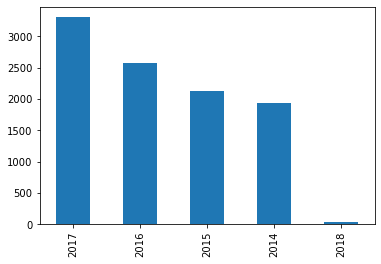

In [29]:
df['shipYear'].value_counts().plot.bar()

<AxesSubplot:>

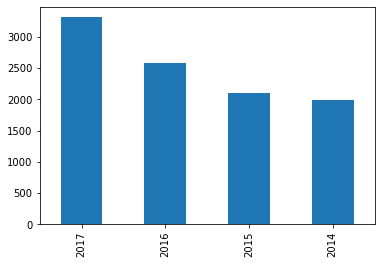

In [30]:
df['orderYear'].value_counts().plot.bar()

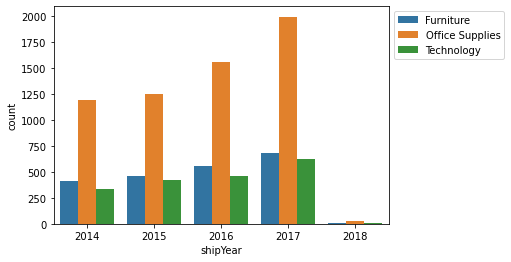

In [31]:
#Ship year Frequency according to category 
sns.countplot(x='shipYear',data=df,hue='Category')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

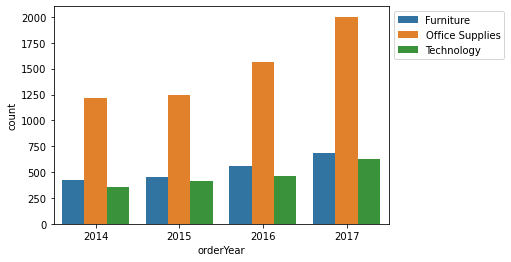

In [32]:
# Order year Frequency according to category 
sns.countplot(x='orderYear',data=df,hue='Category')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

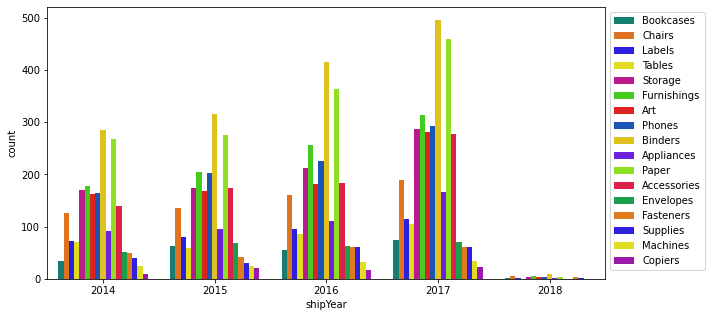

In [33]:
# Ship year Frequency according to sub-category 
plt.figure(figsize=(10,5))
sns.countplot(x='shipYear',data=df,hue='Sub-Category',palette='prism')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

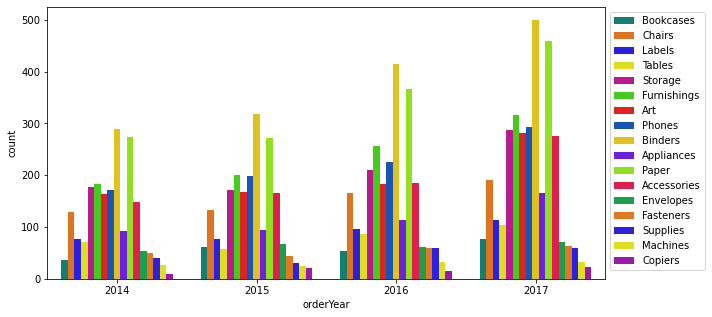

In [34]:
# Order year Frequency according to sub-category 
plt.figure(figsize=(10,5))
sns.countplot(x='orderYear',data=df,hue='Sub-Category',palette='prism')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

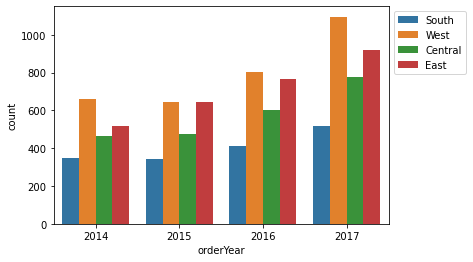

In [35]:
# Order year Frequency according to region 
sns.countplot(x='orderYear',data=df,hue='Region')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

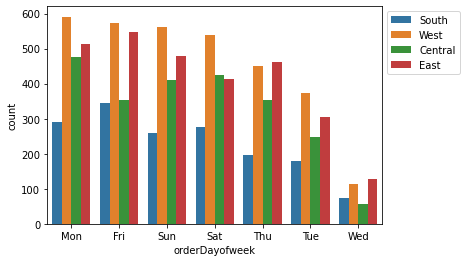

In [36]:
# what day of the week were made the most order and from which region
order=['Mon','Fri','Sun','Sat','Thu','Tue','Wed']
sns.countplot(x='orderDayofweek',data=df,hue='Region',order=order)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

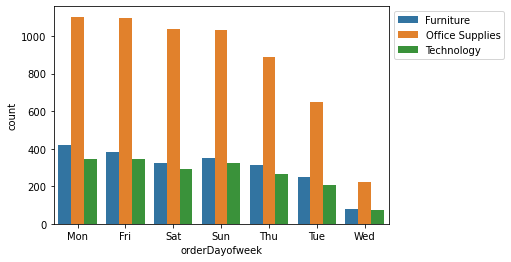

In [37]:
# Order day of week Frequency according to category
order=['Mon','Fri','Sat','Sun','Thu','Tue','Wed']
sns.countplot(x='orderDayofweek',data=df,hue='Category',order=order)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

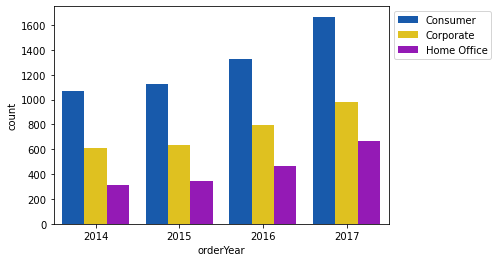

In [38]:
# Order year Frequency according to segment
sns.countplot(x='orderYear',data=df,hue='Segment',palette='prism')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1));

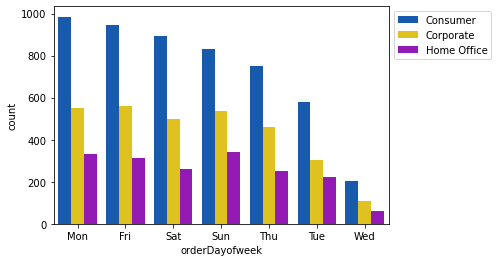

In [39]:
# Order day of week Frequency according to segment
order=['Mon','Fri','Sat','Sun','Thu','Tue','Wed']
sns.countplot(x='orderDayofweek',data=df,hue='Segment',order=order,palette='prism')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

<AxesSubplot:>

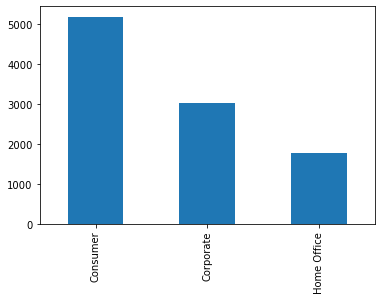

In [40]:
df['Segment'].value_counts().plot.bar()

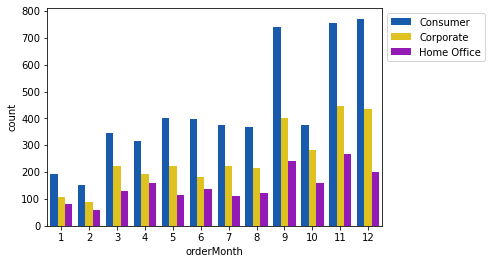

In [41]:
# Order month Frequency according to category
sns.countplot(x='orderMonth',data=df,hue='Segment',palette='prism')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [42]:
df['Product Name'].value_counts()[:5] # top 5 products 

Staple envelope            48
Easy-staple paper          46
Staples                    46
Avery Non-Stick Binders    20
Staples in misc. colors    19
Name: Product Name, dtype: int64

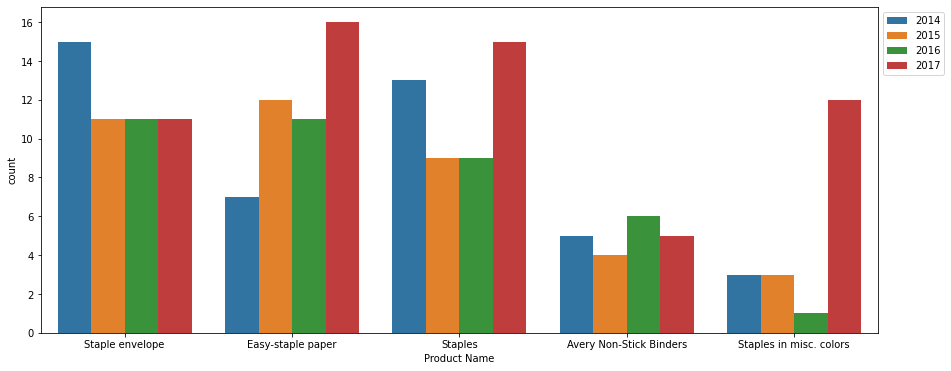

In [43]:
plt.figure(figsize=(15,6))
sns.countplot(x='Product Name',data=df,hue='orderYear',
             order=df['Product Name'].value_counts().iloc[:5].index)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

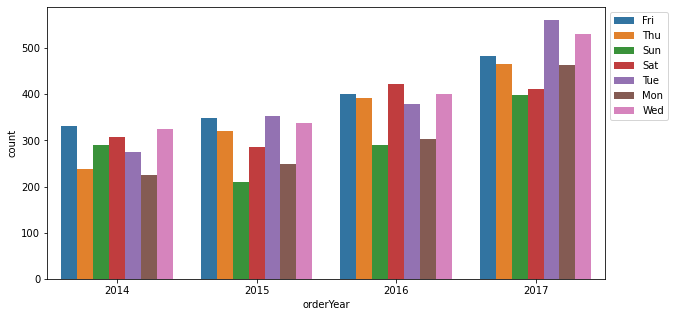

In [44]:

plt.figure(figsize=(10,5))
sns.countplot(x='orderYear',data=df,hue='shipDayofweek')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [45]:
df['shipMonth'].value_counts()[:5] # top 5 ship month made 

11    1436
12    1407
9     1356
10     831
6      764
Name: shipMonth, dtype: int64

In [46]:
df[df['orderYear']==2017]['shipMonth'].value_counts()

12    469
9     452
11    448
10    295
5     243
6     243
8     226
3     225
7     222
4     197
1     174
2     118
Name: shipMonth, dtype: int64

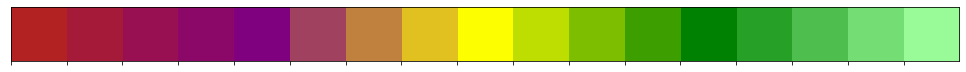

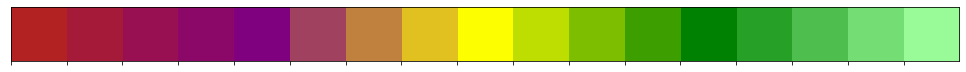

In [51]:
cmap = sns.blend_palette(['firebrick','purple','yellow','green','palegreen'],n_colors=17)
sns.palplot(cmap)
sns.set_palette(cmap,n_colors=17)
sns.palplot(sns.color_palette(n_colors=17))

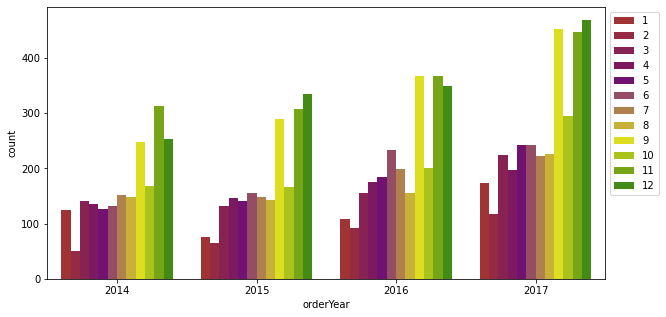

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(x='orderYear',data=df,hue='shipMonth')
sns.set_palette(cmap,n_colors=17)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [54]:
df['Customer ID'].value_counts().head() # top 5 customers 

WB-21850    37
PP-18955    34
MA-17560    34
JL-15835    34
JD-15895    32
Name: Customer ID, dtype: int64

In [55]:
df[['Customer ID','Customer Name']].value_counts().head() # top 5 customers and their names 

Customer ID  Customer Name      
WB-21850     William Brown          37
MA-17560     Matt Abelman           34
JL-15835     John Lee               34
PP-18955     Paul Prost             34
CK-12205     Chloris Kastensmidt    32
dtype: int64

In [56]:
df['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [57]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

In [58]:
df['Product Name'].value_counts().head() # top 5 products sold 

Staple envelope            48
Easy-staple paper          46
Staples                    46
Avery Non-Stick Binders    20
Staples in misc. colors    19
Name: Product Name, dtype: int64

In [59]:
df['Quantity'].value_counts() 

3     2409
2     2402
5     1230
4     1191
1      899
7      606
6      572
9      258
8      257
10      57
11      34
14      29
13      27
12      23
Name: Quantity, dtype: int64

In [60]:
df[['Quantity','Product Name']].value_counts().head()

Quantity  Product Name     
3         Easy-staple paper    16
2         Staple envelope      15
3         Staple envelope      12
          Staples              11
2         Easy-staple paper    10
dtype: int64

<AxesSubplot:>

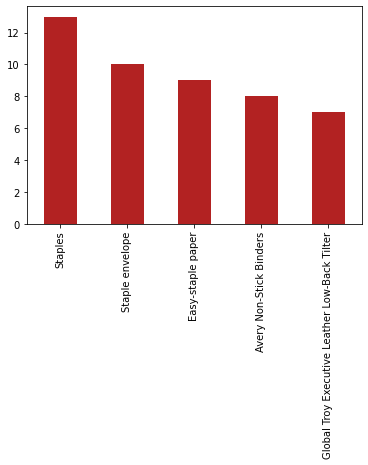

In [61]:
df[df['Region']=='West']['Product Name'].value_counts().head().plot(kind='bar')

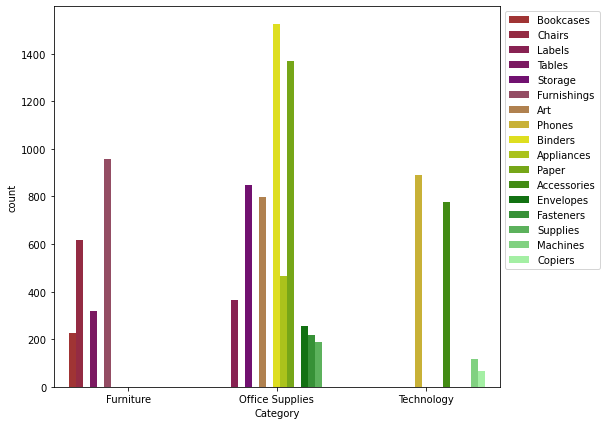

In [62]:
plt.figure(figsize=(8,7))
sns.countplot(x='Category',data=df,hue='Sub-Category')
sns.set_palette(cmap,n_colors=17)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [63]:
df.groupby(['Category','Sub-Category']).count().xs('Furniture').idxmax()[0]

'Furnishings'

In [64]:
df.groupby(['Category','Sub-Category']).count().xs('Office Supplies').idxmax()[0]

'Binders'

In [65]:
df.groupby(['Category','Sub-Category']).count().xs('Technology').idxmax()[0]

'Phones'

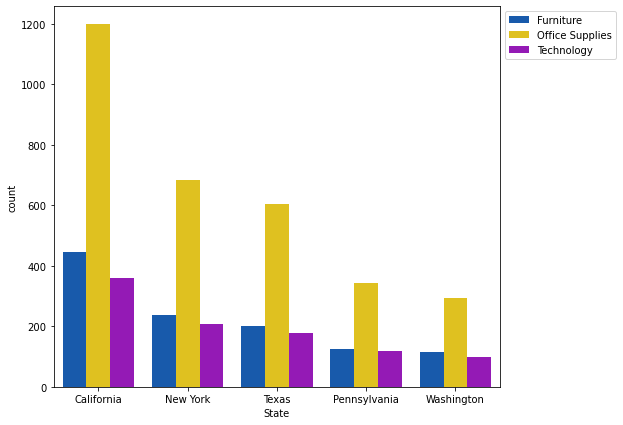

In [66]:
plt.figure(figsize=(8,7))
sns.countplot(x='State',data=df,hue='Category',palette='prism',
             order=df['State'].value_counts().iloc[:5].index)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

In [67]:
df['Product Name'].nunique() # number of unique product names 

1850

<AxesSubplot:>

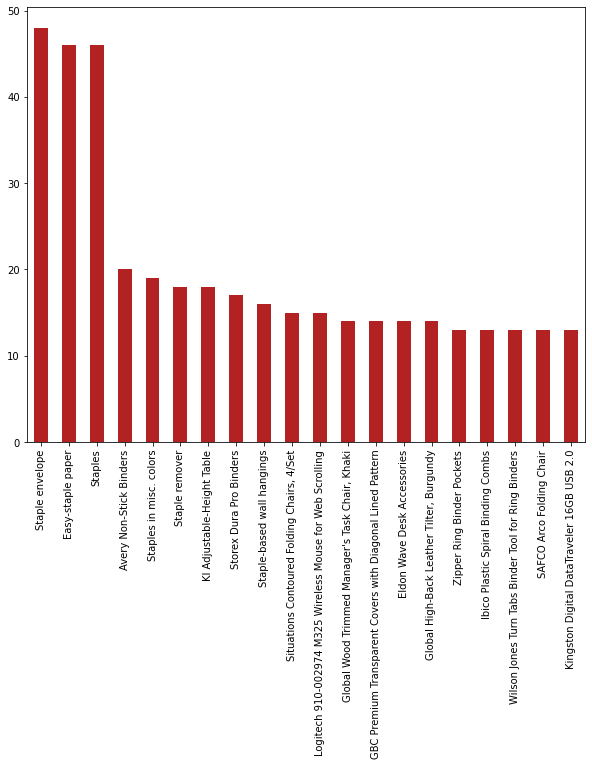

In [68]:
plt.figure(figsize=(10,8))
df['Product Name'].value_counts().head(20).plot(kind='bar') # top 20 sold products 

In [69]:
df[['Product Name','Category','Sub-Category']].value_counts().head()

Product Name             Category         Sub-Category
Staple envelope          Office Supplies  Envelopes       48
Easy-staple paper        Office Supplies  Paper           46
Staples                  Office Supplies  Fasteners       46
Avery Non-Stick Binders  Office Supplies  Binders         20
Staples in misc. colors  Office Supplies  Art             19
dtype: int64

In [70]:
df[['Product Name','Category','Sub-Category','Region']].value_counts().head()

Product Name       Category         Sub-Category  Region 
Staple envelope    Office Supplies  Envelopes     East       17
Easy-staple paper  Office Supplies  Paper         East       15
Staples            Office Supplies  Fasteners     Central    13
Easy-staple paper  Office Supplies  Paper         Central    13
Staple envelope    Office Supplies  Envelopes     Central    13
dtype: int64

In [71]:
df[['City','Category','Sub-Category','Product Name']].value_counts().head(10)

City           Category         Sub-Category  Product Name                                                                  
New York City  Office Supplies  Paper         Easy-staple paper                                                                 7
                                Envelopes     Staple envelope                                                                   7
                                Binders       Acco Pressboard Covers with Storage Hooks, 9 1/2" x 11", Executive Red            4
                                              GBC Premium Transparent Covers with Diagonal Lined Pattern                        4
Los Angeles    Office Supplies  Binders       Avery Non-Stick Binders                                                           4
                                Paper         Easy-staple paper                                                                 4
Houston        Office Supplies  Fasteners     Staples                                          

In [72]:
df[['State','City','Category','Product Name']].value_counts()

State       City           Category         Product Name                                                                              
New York    New York City  Office Supplies  Easy-staple paper                                                                             7
                                            Staple envelope                                                                               7
                                            Acco Pressboard Covers with Storage Hooks, 9 1/2" x 11", Executive Red                        4
California  Los Angeles    Office Supplies  Avery Non-Stick Binders                                                                       4
                                            Easy-staple paper                                                                             4
                                                                                                                                         ..
Ohio        Columbus     

In [73]:
df2 = df.sort_values('Profit',ascending=False)

In [74]:
df2.head()

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,...,Sales,Quantity,Discount,Profit,orderDayofweek,orderMonth,orderYear,shipDayofweek,shipMonth,shipYear
6826,6827,CA-2016-118689,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905,...,17499.95,5,0.0,8399.9760,Sun,10,2016,Sun,10,2016
8153,8154,CA-2017-140151,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,Washington,98115,...,13999.96,4,0.0,6719.9808,Thu,3,2017,Sat,3,2017
4190,4191,CA-2017-166709,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,Delaware,19711,...,10499.97,3,0.0,5039.9856,Fri,11,2017,Wed,11,2017
9039,9040,CA-2016-117121,Standard Class,AB-10105,Adrian Barton,Consumer,United States,Detroit,Michigan,48205,...,9892.74,13,0.0,4946.3700,Sat,12,2016,Wed,12,2016
4098,4099,CA-2014-116904,Standard Class,SC-20095,Sanjit Chand,Consumer,United States,Minneapolis,Minnesota,55407,...,9449.95,5,0.0,4630.4755,Tue,9,2014,Sun,9,2014


In [75]:
df2[['City','Category','Product Name','Profit']].value_counts()

City            Category         Product Name                                                           Profit   
New York City   Office Supplies  Easy-staple paper                                                       7.0218      3
Los Angeles     Office Supplies  Avery Non-Stick Binders                                                 2.2450      3
New York City   Office Supplies  Fiskars Softgrip Scissors                                               15.3720     3
                                 Safco Industrial Wire Shelving System                                   0.0000      3
Philadelphia    Office Supplies  Avery 483                                                               5.1792      2
                                                                                                                    ..
Pembroke Pines  Office Supplies  14-7/8 x 11 Blue Bar Computer Printout Paper                            40.3536     1
                Furniture        Hon Practical Founda

In [76]:
df[['Product Name','Sales']].value_counts()

Product Name                                                                                  Sales   
Eldon Expressions Wood Desk Accessories, Oak                                                  14.760      6
Adams Telephone Message Book W/Dividers/Space For Phone Numbers, 5 1/4"X8 1/2", 300/Messages  11.760      5
Storex Dura Pro Binders                                                                       3.564       5
Avery 51                                                                                      18.900      4
X-Rack File for Hanging Folders                                                               22.580      4
                                                                                                         ..
Nortel Meridian M5316 Digital phone                                                           1294.750    1
Nortel Networks T7316 E Nt8 B27                                                               108.784     1
                                 

In [77]:
df.shape

(9994, 25)

In [78]:
df.head()

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,...,Sales,Quantity,Discount,Profit,orderDayofweek,orderMonth,orderYear,shipDayofweek,shipMonth,shipYear
0,1,CA-2016-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,261.9600,2,0.00,41.9136,Tue,11,2016,Fri,11,2016
1,2,CA-2016-152156,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,...,731.9400,3,0.00,219.5820,Tue,11,2016,Fri,11,2016
2,3,CA-2016-138688,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,...,14.6200,2,0.00,6.8714,Sun,6,2016,Thu,6,2016
3,4,US-2015-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,...,957.5775,5,0.45,-383.0310,Sun,10,2015,Sun,10,2015
4,5,US-2015-108966,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,...,22.3680,2,0.20,2.5164,Sun,10,2015,Sun,10,2015


In [94]:
df['Sale per unit'] = round(df['Sales']/df['Quantity'],4)

In [95]:
df['Sale per unit']

0       130.9800
1       243.9800
2         7.3100
3       191.5155
4        11.1840
          ...   
9989      8.4160
9990     45.9800
9991    129.2880
9992      7.4000
9993    121.5800
Name: Sale per unit, Length: 9994, dtype: float64

In [96]:
df['Sale per unit'].max()

3773.08

In [97]:
df[df['Sale per unit']==3773.08]

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,...,Quantity,Discount,Profit,orderDayofweek,orderMonth,orderYear,shipDayofweek,shipMonth,shipYear,Sale per unit
2697,2698,CA-2014-145317,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,Florida,32216,...,6,0.5,-1811.0784,Tue,3,2014,Sun,3,2014,3773.08


In [98]:
df['Sale per unit'].min()

0.336

In [99]:
df[df['Sale per unit']==0.336]

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,...,Quantity,Discount,Profit,orderDayofweek,orderMonth,orderYear,shipDayofweek,shipMonth,shipYear,Sale per unit
2427,2428,CA-2016-169922,Standard Class,MZ-17515,Mary Zewe,Corporate,United States,Arlington,Texas,76017,...,4,0.8,-2.1504,Sat,6,2016,Fri,6,2016,0.336
6818,6819,CA-2017-163860,Standard Class,LO-17170,Lori Olson,Corporate,United States,Peoria,Illinois,61604,...,5,0.8,-2.6880,Thu,12,2017,Mon,1,2018,0.336


In [100]:
df['Profit per unit'] = df['Profit']/df['Quantity']

In [101]:
df['Profit per unit']

0       20.9568
1       73.1940
2        3.4357
3      -76.6062
4        1.2582
         ...   
9989     1.3676
9990     7.8166
9991     9.6966
9992     3.3300
9993    36.4740
Name: Profit per unit, Length: 9994, dtype: float64

In [102]:
df['Profit per unit'].max()

1679.9952

In [103]:
df[df['Profit per unit']==1679.9952]

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,...,Discount,Profit,orderDayofweek,orderMonth,orderYear,shipDayofweek,shipMonth,shipYear,Sale per unit,Profit per unit
4190,4191,CA-2017-166709,Standard Class,HL-15040,Hunter Lopez,Consumer,United States,Newark,Delaware,19711,...,0.0,5039.9856,Fri,11,2017,Wed,11,2017,3499.99,1679.9952
6826,6827,CA-2016-118689,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905,...,0.0,8399.9760,Sun,10,2016,Sun,10,2016,3499.99,1679.9952
8153,8154,CA-2017-140151,First Class,RB-19360,Raymond Buch,Consumer,United States,Seattle,Washington,98115,...,0.0,6719.9808,Thu,3,2017,Sat,3,2017,3499.99,1679.9952


In [104]:
5039.9856/3 , 8399.9760/5 , 6719.9808/4

(1679.9952, 1679.9952, 1679.9952)

In [105]:
df['Profit per unit'].min()

-1319.9956

In [106]:
df[df['Profit per unit']==-1319.9956]

,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,...,Discount,Profit,orderDayofweek,orderMonth,orderYear,shipDayofweek,shipMonth,shipYear,Sale per unit,Profit per unit
3151,3152,CA-2015-147830,First Class,NF-18385,Natalie Fritzler,Consumer,United States,Newark,Ohio,43055,...,0.7,-2639.9912,Tue,12,2015,Fri,12,2015,899.997,-1319.9956
7772,7773,CA-2016-108196,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,Ohio,43130,...,0.7,-6599.9780,Fri,11,2016,Fri,12,2016,899.997,-1319.9956


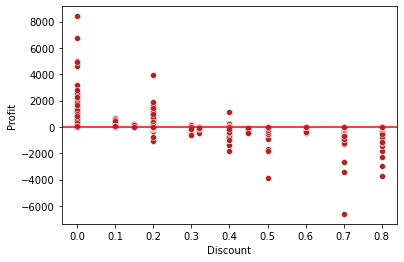

In [107]:
sns.scatterplot(x='Discount',y='Profit',data=df)
plt.axhline(y=0, color='r', linestyle='-')


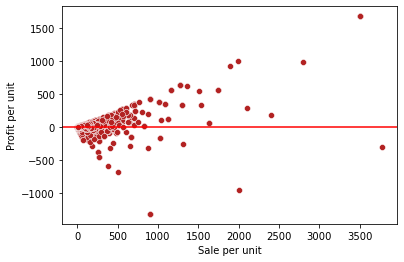

In [109]:
sns.scatterplot(x='Sale per unit',y='Profit per unit',data=df)
plt.axhline(y=0, color='r', linestyle='-')


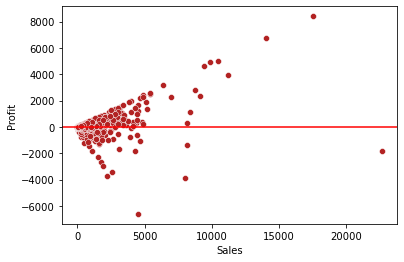

In [110]:
sns.scatterplot(x='Sales',y='Profit',data=df)
plt.axhline(y=0, color='r', linestyle='-')
